In [1]:
# Import libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
 

In [2]:
train = pd.read_csv('train.csv')


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Install missingno:

import missingno as msno

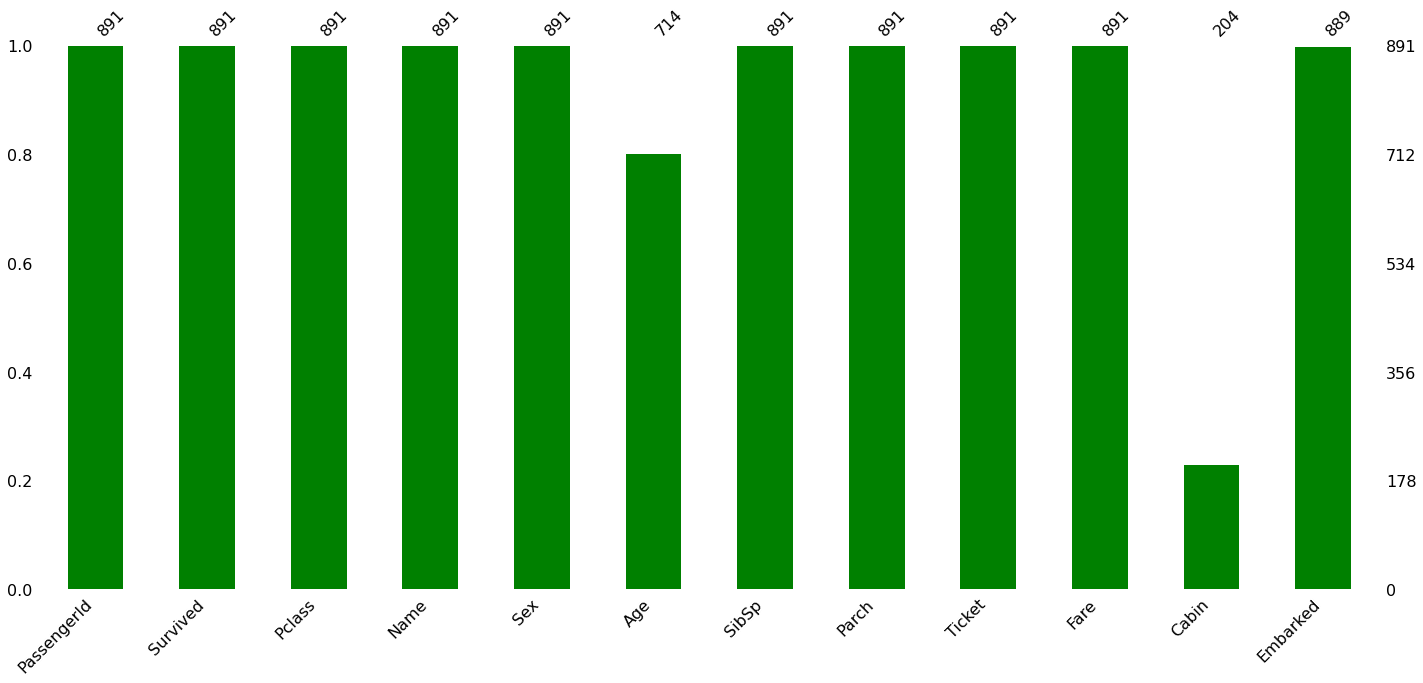

In [6]:
# Bar chart of missing values:

msno.bar(train, color='green');

In [7]:
# Above chart descirbes percentage(x1) and count(x2) of records for each variable(y1).

# The variable 'Cabin' has the most missing values at 204 of 891 populated records (missing 77% of records).

In [8]:
# Drop records where 'Embakred' is null:

train = train.dropna(subset=['Embarked'])

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            712 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          202 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


In [10]:
# Fill empty cabin values with '¯\_(ツ)_/¯'

train['Cabin'] = train['Cabin'].fillna('¯\_(ツ)_/¯')


In [11]:
# Create 'FamilyCount' as sum of sibling/spouse count and number of parents/children aboard:
# Adding 1 to this sum to account for lone travelers. This way, 'FamilyCount' represents the entire family size.

train['FamilyCount'] = train['SibSp'] + train['Parch'] + 1

In [12]:
# Create binary variable for Reverend:
# Code adapted from pandas.pydata.org: df[df['A'].str.contains('string')]

train['IsReverend'] = train['Name'].str.contains('Rev', na=False)

In [13]:
# Create Indicator Variables for variables 'Embarked' and 'Sex':

train = pd.get_dummies(train, columns=['Embarked'])
train = pd.get_dummies(train, columns=['Sex'])

In [14]:
# BONUS:
# Extract the title from everyone's name and create dummy columns

train['Title'] = [i.split(',')[1].split('.')[0].strip() for i in train['Name']]

In [15]:
# Overal Survival Rate:
# This calculation assumes each ticket represents one person.

#sum(train['Survived'])/sum(train['FamilyCount'])
sum(train['Survived'])/train['PassengerId'].nunique()


0.38245219347581555

In [40]:
# Male and Female Survival Rates:

sex_survived = train.groupby('Sex_male')['Survived'].mean()
sex_survived
# Male: 19%
# Female: 74%

Sex_male
0    0.740385
1    0.188908
Name: Survived, dtype: float64

In [29]:
# Class Survival Rates:

class_survived=train.groupby('Pclass')['Survived'].mean()
class_survived
# 1: 62%
# 2: 47%
# 3: 25%

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [27]:
# Reverend Survival Rate:

train.groupby('IsReverend')['Survived'].mean()

# Reverend: 0%

IsReverend
False    0.385051
True     0.000000
Name: Survived, dtype: float64

In [49]:
# ¯\_(ツ)_/¯ Cabn Survival Rate:

train.groupby('Cabin')['Survived'].mean()

# ¯\_(ツ)_/¯: 30%

Cabin
A10          0.000000
A14          0.000000
A16          1.000000
A19          0.000000
A20          1.000000
               ...   
F38          0.000000
F4           1.000000
G6           0.500000
T            0.000000
¯\_(ツ)_/¯    0.299854
Name: Survived, Length: 147, dtype: float64

In [20]:
#Survival Rate for those with no listed age: 

train['Age'].isnull().groupby(train['Survived']).mean()

# No Listed Age: 15%

Survived
0    0.227687
1    0.152941
Name: Age, dtype: float64

In [51]:
# Survival rate for each Embarkment Location:

# C: 55%
# Q: 39%
# S: 34%

#train.groupby('Embarked_C').mean()
#train.groupby('Embarked_Q').mean()
train.groupby('Embarked_S').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Sex_female,Sex_male
Embarked_S,,,,,,,,,,,,,
0,436.726531,0.502041,2.208163,30.331772,0.400000,0.302041,45.283880,1.702041,0.004082,0.685714,0.314286,0.444898,0.555102
1,449.527950,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812,1.984472,0.007764,0.000000,0.000000,0.315217,0.684783


In [34]:
# Survival Rate for children (under 12) in each 'Pclass':

# Under 12 mask
under_twelve = train['Age'] < 12 

under_12_surv_by_class = train[under_twelve].groupby('Pclass')['Survived'].mean()

# 1: 75%
# 2: 100%
# 3: 40%

Pclass
1    0.750000
2    1.000000
3    0.404255
Name: Survived, dtype: float64

In [59]:
male = train['Sex_male'] == 1 
male_surv_by_class = train[male].groupby('Pclass')['Survived'].mean()



In [23]:
# Did the captain survive? Is he on the list?

train[train['Name'].str.contains('Capt')]

# Went down with the ship, but is on the list.

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title
745,746,0,1,"Crosby, Capt. Edward Gifford",70.0,1,1,WE/P 5735,71.0,B22,3,False,0,0,1,0,1,Capt


In [24]:
# Of those who died, who paid the most for a ticket?:

#died = train['Survived'] == 0
#train[died]['Fare'].max()

#train['Fare'].max().where(train['Survived']==0)

train.groupby(['Survived'], sort=False)['Fare'].max()

Survived
0    263.0000
1    512.3292
Name: Fare, dtype: float64

In [25]:
train['Fare'].sort_values()

271      0.0000
597      0.0000
302      0.0000
633      0.0000
277      0.0000
         ...   
341    263.0000
88     263.0000
737    512.3292
679    512.3292
258    512.3292
Name: Fare, Length: 889, dtype: float64

In [57]:
# Family on boat help or hurt chances of survival?

# Show survival rates by family count...

# Gah, struggling. Need to come back to this.

family_count_survived = train.groupby('FamilyCount')['Survived'].mean()
family_count_survived

FamilyCount
1     0.300935
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [ ]:
# Plotting Survival Rates by Group:

# Return to this and make more interesting and revealing plots, when able. 
# Would like to break down gender survival rates by class.

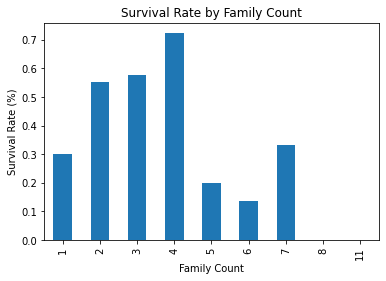

In [58]:
family_count_survived.plot.bar()
plt.title('Survival Rate by Family Count'),
plt.xlabel('Family Count'),
plt.ylabel('Survival Rate (%)');

# Fascinating. I added +1 to the family count to include those passengers with
# no family in the variable 'FamilyCount.' Assuming only one ticket was issued
# per family (not sure how it worked back then), this suggests smaller families
# tended to survive at a higher rate than did single travelers or large families.
# There are probably some confounding factors here.




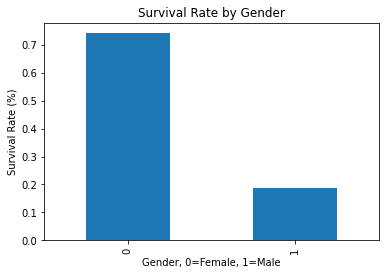

In [52]:
# Survival Rate by Gender 
sex_survived.plot.bar()
plt.title('Survival Rate by Gender'),
plt.xlabel('Gender, 0=Female, 1=Male'),
plt.ylabel('Survival Rate (%)');

# "Women and children, first."

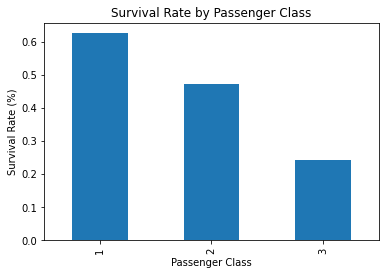

In [53]:
# Survival Rate by Passenger Class:
class_survived.plot.bar();
plt.title('Survival Rate by Passenger Class'),
plt.xlabel('Passenger Class'),
plt.ylabel('Survival Rate (%)');

# Some ugly things don't change.

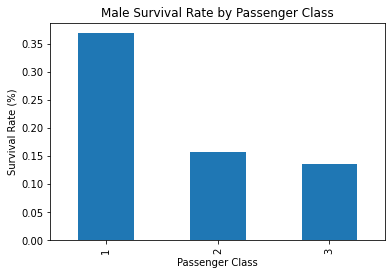

In [62]:
male_surv_by_class.plot.bar();
plt.title('Male Survival Rate by Passenger Class'),
plt.xlabel('Passenger Class'),
plt.ylabel('Survival Rate (%)');

# "Women and children first, unless you're rich." Woof.

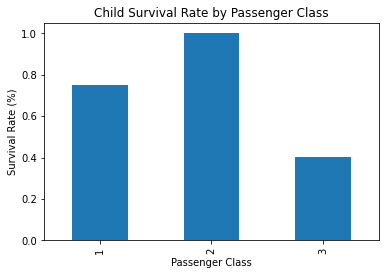

In [48]:
# Under 12 Survival Rate by class:
under_12_surv_by_class.plot.bar();
plt.title('Child Survival Rate by Passenger Class'),
plt.xlabel('Passenger Class'),
plt.ylabel('Survival Rate (%)');

# Not sure if I have a guess at this one.